In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as s
df = pd.read_csv("indian_houseprice_dataset.csv")
df.head()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1.982,1.0,3,2.00,133,0,14.2212
1,1.676,1.5,3,0.38,14,1,13.4865
2,1.694,2.0,3,0.96,15,1,11.8007
3,1.800,1.0,2,0.48,49,1,13.8297
4,2.088,1.0,3,1.84,29,1,12.9470


In [ ]:
df.shape

(1047, 7)

In [ ]:
df.isnull().sum()

,0
Living Area,0
Bathrooms,0
Bedrooms,0
Lot Size,0
Age,0
Fireplace,0
Price,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Price','Age'])
y = df['Price']

In [ ]:
X = s.add_constant(X)

In [ ]:
model = s.OLS(y, X).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     365.5
Date:                Tue, 22 Jul 2025   Prob (F-statistic):          3.42e-226
Time:                        04:43:05   Log-Likelihood:                -2956.1
No. Observations:                1047   AIC:                             5924.
Df Residuals:                    1041   BIC:                             5954.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.5735      0.576      2.730      

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(837, 6)
(210, 6)


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"r2 score is {r2_score(y_test,y_pred)}")
print(f"mean_squared_error is {mean_squared_error(y_test,y_pred)}")

r2 score is 0.6288896988696744
mean_squared_error is 18.31398962205118


In [ ]:
import matplotlib.pyplot as plt

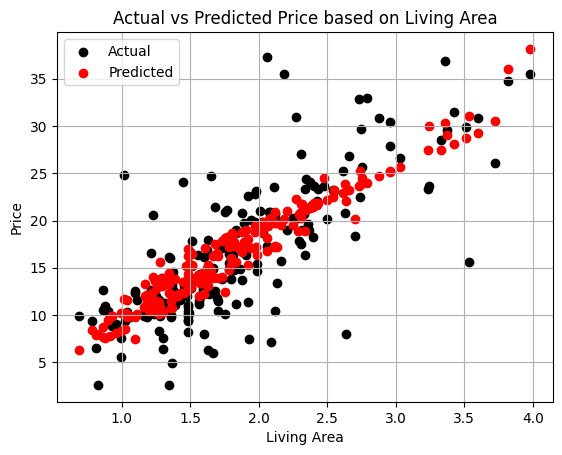

In [ ]:
plt.scatter(X_test['Living Area'], y_test, color='black', label='Actual')
plt.scatter(X_test['Living Area'], y_pred, color='red', label='Predicted')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price based on Living Area')
plt.legend()
plt.grid(True)
plt.show()